# Discussion the relationship between 'HOSPITALIZED_COUNT' and 'DEATH_COUNT	'

In [30]:
# https://codeantenna.com/a/zwpe6thnM7
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Import data

In [31]:
data = pd.read_csv('data-by-day.csv')
data.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.dtypes

date_of_interest                  object
CASE_COUNT                         int64
PROBABLE_CASE_COUNT                int64
HOSPITALIZED_COUNT                 int64
DEATH_COUNT                        int64
                                   ...  
SI_ALL_CASE_COUNT_7DAY_AVG         int64
SI_HOSPITALIZED_COUNT_7DAY_AVG     int64
SI_DEATH_COUNT_7DAY_AVG            int64
SI_ALL_DEATH_COUNT_7DAY_AVG        int64
INCOMPLETE                         int64
Length: 67, dtype: object

## Split data into training data and test data

In [33]:
feature = ['HOSPITALIZED_COUNT']
x = data[feature]
y = data['DEATH_COUNT']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# SVM
## Build model

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# https://github.com/Wasim37/machine_learning_code/blob/master/04%20%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA%20SVM/notebook/08_%E6%A1%88%E4%BE%8B%E5%85%AB%EF%BC%9A%E4%BD%BF%E7%94%A8SVM%E9%A2%84%E6%B5%8B%E6%B3%A2%E5%A3%AB%E9%A1%BF%E6%88%BF%E4%BB%B7.ipynb
# https://zhuanlan.zhihu.com/p/500835231
# https://blog.csdn.net/qq_41897304/article/details/121777109
## 模型构建（参数类型和SVC基本一样）
parameters = {
    'kernel': ['rbf', 'linear'],
    'C': [0.5],
    'gamma': [0.00005]
}
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.5], 'gamma': [5e-05],
                         'kernel': ['rbf', 'linear']})

In [35]:
## 获取最优参数
print ("最优参数列表:", model.best_params_)
print ("最优模型:", model.best_estimator_)
print ("最优准确率:", model.best_score_)

最优参数列表: {'C': 0.5, 'gamma': 5e-05, 'kernel': 'linear'}
最优模型: SVR(C=0.5, gamma=5e-05, kernel='linear')
最优准确率: 0.5007732810958182


## Visualization

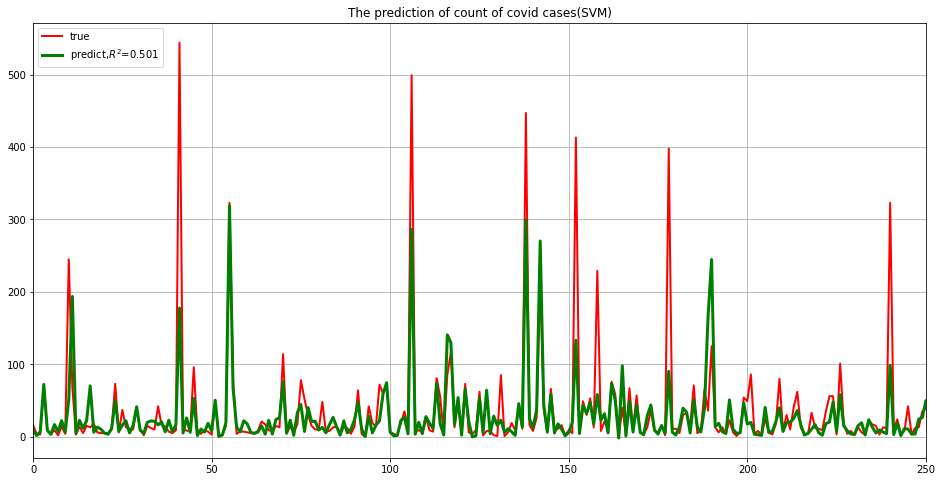

In [36]:
colors = ['g-', 'b-']
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)

plt.figure(figsize=(16,8), facecolor='w')
plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'true')
plt.plot(ln_x_test, y_predict, 'g-', lw = 3, label=u'predict,$R^2$=%.3f' % (model.best_score_))

plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"The prediction of count of covid cases(SVM)")
plt.xlim(0, 250)
plt.show()

## Accuracy

In [37]:
print ("the accuracy on training data: %.2f%%" % (model.score(x_train, y_train) * 100))
print ("the accuracy on test data: %.2f%%" % (model.score(x_test, y_test) * 100))

the accuracy on training data: 52.99%
the accuracy on test data: 57.06%


In [44]:
# import statsmodels.api as sm
X_new = sm.add_constant(x)
regcorr = sm.OLS(y, X_new)
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:            DEATH_COUNT   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1476.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.61e-199
Time:                        17:55:44   Log-Likelihood:                -5380.0
No. Observations:                1008   AIC:                         1.076e+04
Df Residuals:                    1006   BIC:                         1.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.1881      1

In [45]:
# from sklearn.svm import SVR
import sklearn.metrics as metrics
#最佳为1
print("the Coefficient of determination of test data：", 
      metrics.r2_score(y_test,y_predict))
#均方误差是非负值，模型越好MSE越接近零。
print("the mean squared error of test data：", 
      metrics.mean_squared_error(y_test,y_predict))
#平均绝对误差是非负值，模型越好MAE越接近零
print("the mean absolute error of test data：", 
      metrics.mean_absolute_error(y_test,y_predict))
#中值绝对误差是非负值，模型越好越接近零。
print("the median absolute error of test data：", 
      metrics.median_absolute_error(y_test,y_predict))
#最佳为1，模型越差值越小
print("the explained_variance_score of test data：", 
      metrics.explained_variance_score(y_test,y_predict))

the Coefficient of determination of test data： 0.5706197389824152
the mean squared error of test data： 2370.770182437442
the mean absolute error of test data： 18.396997929614813
the median absolute error of test data： 6.443478260857383
the explained_variance_score of test data： 0.5790800141700392
